<a href="https://colab.research.google.com/github/dandoreyrodriguez/This-was-an-epic-failyre/blob/main/FIM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Learning the Foundations of International Macroeconomics: Class 1**

This is the first in a series of notebooks which follows me on my journey to learn international macroeconomics from [Obsfeld and Rogoff](https://mitpress.mit.edu/9780262150477/foundations-of-international-macroeconomics/) (OR) using Python. Though I stick to the sections in OR, I will include only as much as I need to understand the topics properly. Equally, I may include supplementary commentary where I struggled.

This series is naturally aimed at people like me: those with a background in modern macro but with no formal training in international macro. Nevertheless, economics should be about understanding the basics first, and only then adding complications. It turns out that deeply understanding the basics often takes you most of the way. By trying to emphasises the basics, I will try to make it as accessible and clear as possible.

The language of modern macro is dynamic stochastic general equilibrium models. As Tom Sargent says [here](https://www.youtube.com/watch?v=0Mf_LvwxFqY&t=968s&pp=ygUOc2FyZ2VudCBweWRhdGE%3D), economists ought to be able to code up their models. I choose to do so here in Python. Doing so forces discipline, clear thinking, and transparency. This is my attempt to follow Sargent's advice.

Enjoy!


## **Chapter 1: Intertemporal Trade and the Current Account Balance**

A recurring theme in economics is the idea of smoothing. One reason for trade is in order to smooth consumption over time. OR explore this theme in chaper 1.

### **1.1: A Small Two-Period Endowment Economy**

Imagine that there is a small open economy (SOE) in an economy with one good and two periods, $t \in \{ 0, 1 \}$. There is a representative consumer who faces a familiar problem, maximising utility subject to some constraints:

$$ \max_{ \{ c_0, c_1, b_1 \} } u(c_0)+ \beta u(c_1) \text{ subject to } \begin{cases} c_0, c_1 \geq 0 \\ c_0+b_1 \leq y_0 \\ c_1 \leq (1+r_0)b_1+ y_1 \end{cases} $$  

Some notation. $c_t$ is the quantity of the good consumed in period $t$. $b_t$ is the quantity of real bonds bought in $t-1$ which pay off one  of the good in period $t$. $r_{t-1}$ is the real return on a bond bought in $t-1$ but due in $t$. $y_t \in \mathbb{R}_+$ is the endowment the agent wakes up with in time $t$. The agents preferences are described by $u(.)$, which has the standard properties ($u'(c_t)>0, \, u'(c_t)>0 \, \,  \forall c_t \geq 0 $), and the subjective discount factor which describes some inherent impatience, $\beta \in (0,1)$.

Note, I jumped the gun on a couple of things:
1. The agent is born with no bonds, $b_0=0$
2. It is not optimal to invest in bonds paying out after death, that is $b_2=0$

Imposing the Inada condition, $\underset{c_t \to 0} \lim u'(c_t) = \infty $, and given that we have positive marginal utility, the non-negatvity constraints will not bind and the budget constraints will.

Substitute $c_0$ and $c_1$ out of the problem. We have: $ \underset{b_1} \max u(y_0-b_1)+ \beta u((1+r_0)b_1+y_1)  $. The first order condition is:

$$ u'(c_0) = \beta u'(c_1) (1+r_0) $$

This is a crucial equation. It says that the consumer will rebalance consumption across time periods until this Euler Equation (EE) holds. Until the marginal cost of forgoing consumption today is equal to the marginal benefit of consuming tomorrow. This is very intuitive: consumers rebalance and stop when they no longer are indifferent across time-periods.

Note what needs to be given. The consumer plan takes $\{r_0, y_0, y_1\}$ as given. It is a SOE so has no impact on the rate of return. Moreover, it knows its preferences.

Now for some python code!

I am going to impose $y_0 = 0.5, y_1 = 1.5, \beta = 0.98, u(c_t) = \ln (c_t) $. I will illustrate the bundle that the agent can achieve with trade and without it for different global real rates of interest.



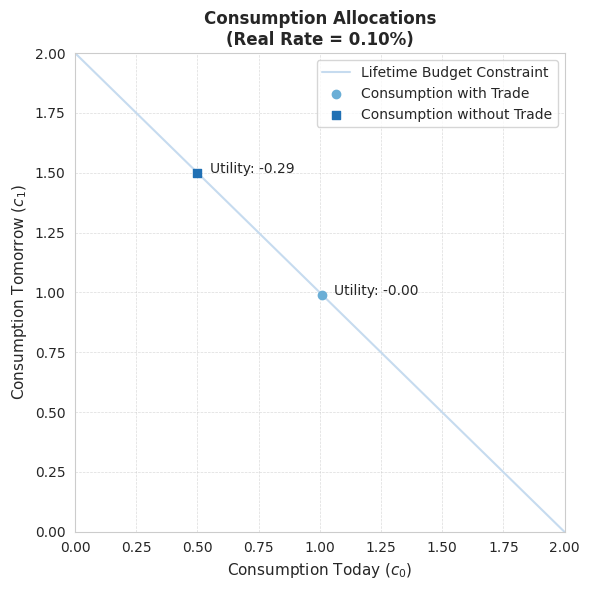

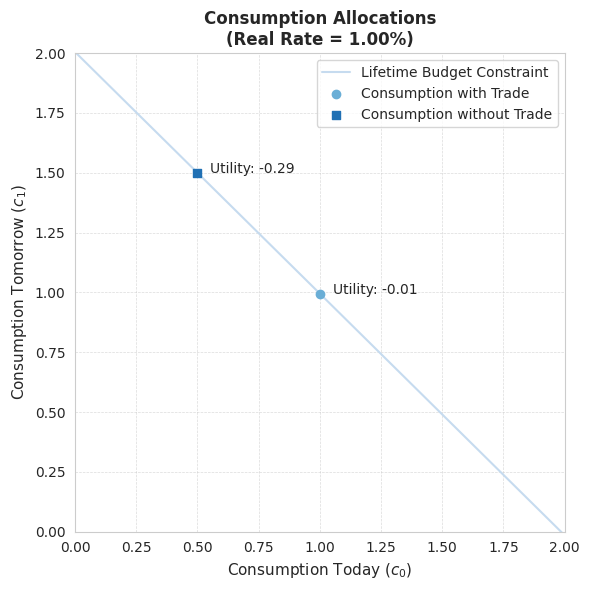

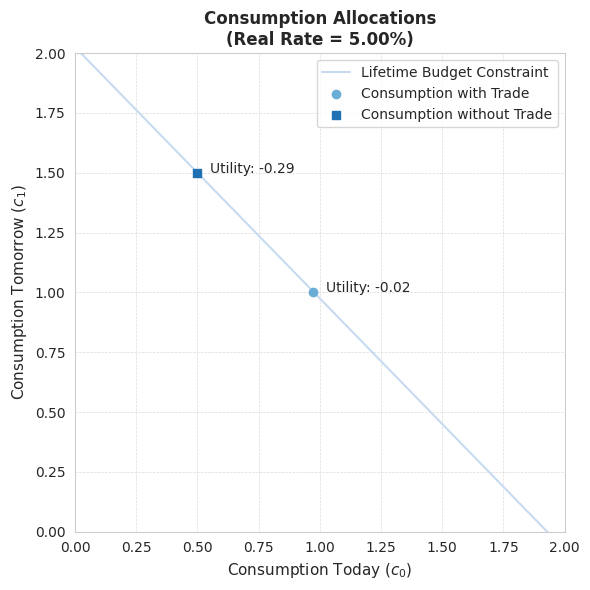

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for styling
import numpy as np

# The initial global variables
y_0 = 0.5
y_1 = 1.5
beta = 0.98


# Define a function which calculates an allocation bundle for a given real rate
def solve_two_period(real_rate):
    # Substituting the EE into the lifetime budget constraint
    c_0 = (1 / (1 + beta)) * (y_0 + (y_1 / (1 + real_rate)))
    c_1 = beta * (1 + real_rate) * c_0
    return c_0, c_1


def plot_allocations(real_rate):
    # Solve for consumption allocations
    c_0, c_1 = solve_two_period(real_rate)

    # Create a seaborn figure with a blue color palette
    sns.set_style("whitegrid")  # Set white background with grid
    palette = sns.color_palette("Blues", 3)  # Blue color palette with 3 shades

    # Generate consumption allocations for the plot
    c_0_vals = np.linspace(0, 2, 100)
    c_1_vals = (y_0 - c_0_vals) * (1 + real_rate) + y_1

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size for better viewing

    # Plot the lifetime budget constraint
    ax.plot(c_0_vals, c_1_vals, color=palette[0], label="Lifetime Budget Constraint")

    # Plot consumption allocation with a marker
    ax.scatter(c_0, c_1, marker='o', color=palette[1], label=f"Consumption with Trade", zorder=3)
    utility_trade = np.log(c_0) + np.log(c_1)  # Optimal utility
    ax.text(c_0 + 0.05, c_1, f'Utility: {utility_trade:.2f}', fontsize=10, ha='left')

    # Plot the endowment bundle with a different marker
    ax.scatter(y_0, y_1, marker='s', color=palette[2], label="Consumption without Trade", zorder=2)
    utility_endowment = np.log(y_0) + np.log(y_1)
    ax.text(y_0 + 0.05, y_1, f'Utility: {utility_endowment:.2f}', fontsize=10, ha='left')

    # Add labels and formatting
    ax.set_title(f'Consumption Allocations\n(Real Rate = {real_rate:.2%})', fontweight="bold", fontsize=12)
    ax.set_xlabel('Consumption Today ($c_0$)', fontsize=11)
    ax.set_ylabel('Consumption Tomorrow ($c_1$)', fontsize=11)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Adjust grid style for clarity
    ax.legend(fontsize=10)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()


# Real interest rates for each plot
real_rates = [0.001, 0.01, 0.05]

# Loop through and plot for each real rate
for rate in real_rates:
    plot_allocations(rate)

In these examples, the SOE borrows in period $t=0$ when its endowment is low, and pays off the interest in the next period. Trade unambiguously helps the agent achieve greater utility.

**Definition**: the current account balance is the change in a country's net foreign assets.

In this world where only bonds are traded, the current account is: $CA_t = b_{t+1}-b_t=y_t+r_{t-1}b_t-c_t$. In period zero the current account was, $CA_0 = b_1 = y_0 -c_0$. In the next period, the current account was $CA_1 = -b_1 = y_1+r_0b_1-c_1$. This is slightly confusing because $b_1<0$ in my example. The country takes a negative position in foreign assets (borrows from the rest of the world) so runs a negative current account.

As an accounting identity, net exports must be equal to the current account balance. This is because the current account is precisely how that trade deficit is financed.



### **1.2: The Role of Investment**

In a world without capital (and hence without investment) consumption smoothing is a reason for one country to engage the rest of the world. Another to engage the rest of the world is to finance capital investments. For this we introduce production and capital.

The production function of a representative firm is $y_t = f_t(K_t)$ where $K_t \geq 0, f_t'(K_t)>0, f_t''(K_t)<0, f_t(0)=0, \underset{K_t \to 0}\lim f'(K_t) = \infty $. One unit of the consumption good can be changed into one unit of the consumption good (to not get bogged down in accounting).

Capital evolves according to $K_{t+1} = i_t +K_t$. Here, there is no depreciation. Households rent capital to firms. Notice now that private wealth can now be summarised as $k_{t+1}+b_{t+1}$. Lower case letters refer to the household, uppercase letters refer to the firm.  

Recall, the capital account is: $CA_t = b_{t+1}-b_t = y_t + r_{t-1}b_t - c_t - i_t = s_t - i_t$

Using the same toolkit as we usually use in macro. The consumer problem is now slightly more complex. $r^k_t$ is the rental rate on capital acquired in period $t$. Note that it pays in the following period. I do this to be consistent with the bond notation.

$$ \max_{ \{ c_0, c_1, b_1,k_1\} } u(c_0)+ \beta u(c_1) \text{ subject to } \begin{cases} c_0, c_1,k_1 \geq 0 \\ c_0+b_1+k_1-k_0 \leq r^k_{-1} k_0 \\ c_1-k_1 \leq (1+r_0)b_1+ r^k_{0} k_1 \end{cases} $$  

The problem must specify how much capital is inherited, $k_{0}$. Moreover, $k_2=0$ since there are only two periods. Again, substitute $c_0$ and $c_1$ to get:  $ \underset{ \{ b_1,k_1 \} } \max u(y_0-b_1+(1+r_{-1}^k ) k_0-k_1)+ \beta u((1+r_0)b_1+(1+r^k_0)k_1)  $.

The optimality conditions are:

$$ \begin{align} u'(c_0) &= \beta u'(c_1) (1+r_0) \\ u'(c_0) &= \beta u'(c_1)(1+r^k_0)  \\ \implies r_0 &= r^k_0 \end{align}$$

This is a no arbitrage condition between investing in bonds and capital. This establishes an independence of investment from consumption preferences. Consumers (owners of capital) will invest in capital if it offers a rate of return above the global rate. They keep investing until the rates are driven to equality, regardless of what is happening internally.

The firm problem is the same in both periods:

$$ \max_{\{K_t\}} f(K_t) - r_{t-1}^k K_t$$

The firm optimality condition is that the firm hires capital until the marginal product of capital is equal to the rental rate. Factor markets are competitive.

$$ f'(K_t) = r_{t-1}^k$$

As often in modern macro, equilibrium here is a little more subtle. Equilibrium is a set of prices $\{r_0, r^k_0\}$, a consumption plan $\{c_0, c_1\}$, capital and bond choices $\{k_1,b_1\}$ and production plan $\{K_0, K_1\}$, such that the consumer and producer firm optimality conditions hold and markets clear. The markets are:
1. Capital market: $k_t=K_t$ (the classic big K little k discussion)
2. Goods market: $ c_t+k_{t+1}-k_t+b_{t+1} = f(K_t)+(1+r_{t-1})b_t$

The key point here though is that opening up to international markets can send an economy on a different capital accumulation path in order to close the arbitrage between the rate of return on capital and the global rate of return.

Solving for allocations here is more involved. I show the allocation under autarky and when integrated into global capital markets. I use the same preferences as before. I use the production function $f(K_t)=K_t^{0.5}$. Say we inherit one unit of capital $k_0=1$.




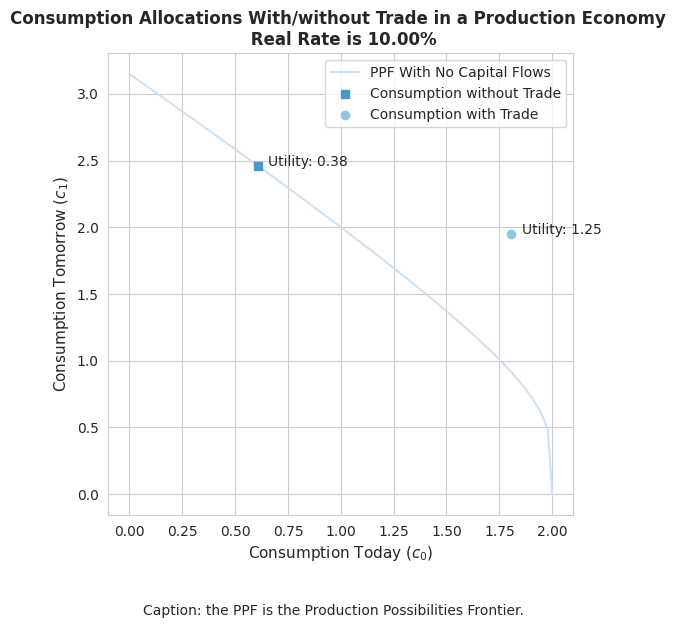

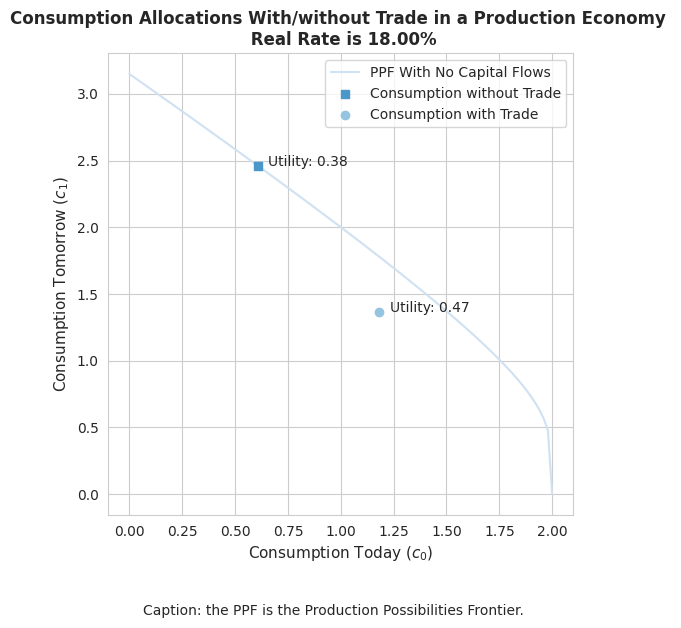

In [28]:
# Set some initial parameters
alpha = 0.2
k_0 = 1

def plot_two_period_capital(real_rate):
  # First get values for the production possibilities frontier
  # c_1 = f(k_1)+k_1, k_1 = k_0+f(k_0)-c_0
  PPF_xint = k_0 + k_0**alpha # when k_1 = 0
  c_0_vals = np.linspace(0,PPF_xint,100)
  k_1_vals = k_0 + k_0**alpha - c_0_vals
  c_1_vals = (k_1_vals)**alpha + k_1_vals

  # Solve for autarky consumption
  c_0_a = (1 / (1 + beta)) * (1+ alpha* (k_0**(alpha-1)) ) * k_0
  k_1_a = k_0 + k_0**alpha - c_0_a
  c_1_a = k_1_a**alpha + k_1_a

  # Solve for trade consumption
  k_1_trade = (real_rate / alpha)**(1/(alpha-1)) # This comes from no arbitrage
  r_k_inherit = alpha * k_0**(alpha-1) # firm optimality
  c_0_trade = (1/(1+beta))*( (1+r_k_inherit)*k_0 + k_1_trade )
  c_1_trade = c_0_trade * (1+real_rate) * beta

  # Plot
  sns.set_style("whitegrid")
  palette = sns.color_palette("Blues", 4)  # Blue color palette with 3 shades
  fig, ax = plt.subplots(figsize=(6, 6))  # Adjust figure size for better viewing
  ax.plot(c_0_vals, c_1_vals, color=palette[0], label="PPF With No Capital Flows") # plot PFF
  ax.scatter(c_0_a, c_1_a, marker='s', color=palette[2], label="Consumption without Trade", zorder=2) # plot autarkic allocation
  utility_autarky = np.log(c_0_a) + beta * np.log(c_1_a)
  ax.text(c_0_a + 0.05, c_1_a, f'Utility: {utility_autarky:.2f}', fontsize=10, ha='left') # label autarkic utlity
  ax.scatter(c_0_trade, c_1_trade, marker='o', color=palette[1], label=f"Consumption with Trade", zorder=3) # open allocation
  utility_trade = np.log(c_0_trade) + beta * np.log(c_1_trade)
  ax.text(c_0_trade + 0.05, c_1_trade, f'Utility: {utility_trade:.2f}', fontsize=10, ha='left') # label trade utility
  ax.set_title(f'Consumption Allocations With/without Trade in a Production Economy \n Real Rate is {real_rate:.2%}', fontweight="bold", fontsize=12)
  ax.set_xlabel('Consumption Today ($c_0$)', fontsize=11)
  ax.set_ylabel('Consumption Tomorrow ($c_1$)', fontsize=11)
  fig.text(0.5, -0.05, "Caption: the PPF is the Production Possibilities Frontier.", ha="center", va="center")
  ax.legend(fontsize=10)

plot_two_period_capital(0.1)
plot_two_period_capital(0.18)


The general point is that access to international capital markets fundamentally changes the consumption/investment decisions. If the world real rate is below the rate of return on capital in autarky, foreign investors will invest in domestic capital until parity is reached. This allows for greater capital investment without the need for rationing. If the world real rate is higher, there can be gains from intratemporal consumption smoothing. However, if we push the global rate high enough we can make a SOE worse off due to capital flight. This is because in a two-period economy we do not live long enough to reinvest the proceeds of foreign assets.

### **1.3: A Two-Region World Economy**

This section focuses on some issues regarding the global rate when it is determined in general equilibrium.

#### **1.3.1: A Global Endowment Economy**

Suppose we have the same set up as in 1.1 but now two countries rather than a world and SOE. The starred quantities refer to those of the foreign country. Now we must apply an equilibrium concept. Given endowments $ \{y_0, y_1, y_0^*, y_1^* \}$, equilibrium is a consumption plan $\{c_0, c_1, b_1, c_0^*, c_1^*, b_1^*\}$ and global interest rate such that:

1. Consumer optimality holds (EE in 1.1 and budget constraint)
2. The new condition! the international bond (or savings) market clears.

The market clearing condition is that $b_t+b_t^* = 0 $. The world net position in bonds is zero. That is a fancy way of saying there needs to be someone on both sides of every bond, so global consumers are only saving from global consumers. There are no governments...yet.
